In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models



In [2]:
# Load the IMDB dataset (comes built-in with TensorFlow)
# num_words=10000 keeps the top 10,000 most frequent words only
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

print(f"Training entries: {len(X_train)}, labels: {len(y_train)}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training entries: 25000, labels: 25000


In [3]:
# Pad sequences to ensure all are the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256)


In [4]:
# Build the model
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=256),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])


C:\Users\ANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5573 - loss: 0.6918 - val_accuracy: 0.7200 - val_loss: 0.6834
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7295 - loss: 0.6788 - val_accuracy: 0.7126 - val_loss: 0.6575
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7482 - loss: 0.6473 - val_accuracy: 0.7580 - val_loss: 0.6100
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7745 - loss: 0.5944 - val_accuracy: 0.7646 - val_loss: 0.5506
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7992 - loss: 0.5275 - val_accuracy: 0.7970 - val_loss: 0.4880
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8306 - loss: 0.4650 - val_accuracy: 0.8400 - val_loss: 0.4325
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8525 - loss: 0.4085 - val_accuracy: 0.8478 - val_loss: 0.3962
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8622 - loss: 0.3720 - val_accuracy: 0.8566 - v

In [7]:
# Evaluate the model on test data
results = model.evaluate(X_test, y_test)

print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8671 - loss: 0.3375
Test Loss: 0.3396
Test Accuracy: 86.50%


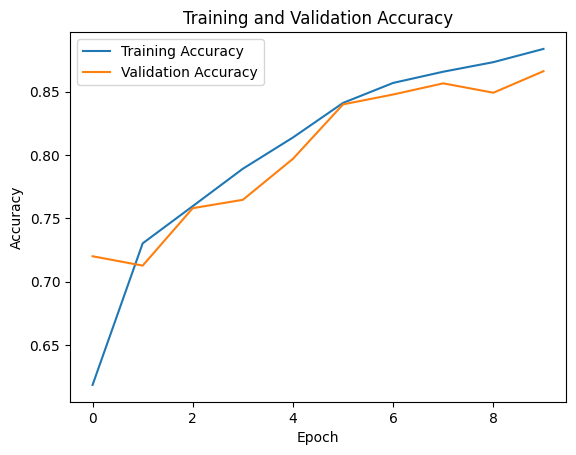

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
